### 1. BlockChain Implementation of proof of work

Blockchain Structure:

Each block stores the model's parameters and its accuracy as proof of contribution.
Proof of Learning:

A node submits an updated model as proof.
The blockchain validates the submission by checking if the new model improves accuracy.
Validation:

The blockchain remains valid if each block's hash matches its recalculated hash and references the correct previous block.
Simulation:

Models are updated with varying hyperparameters, representing the "learning" process.
Contributions are added as blocks if they pass the proof-of-learning criteria.

In [1]:
import hashlib
import time
import json
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Blockchain Block Structure
class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index  # position of the block in chain
        self.timestamp = timestamp # the time at which block was created
        self.data = data  # data for models performace like accuracy etc
        self.previous_hash = previous_hash #hash of the previous block
        self.hash = self.calculate_hash() #hash of the block itself

    def calculate_hash(self): # hash function to create the hash for block itself using the data of the block
        block_string = f"{self.index}{self.timestamp}{json.dumps(self.data)}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()

# Blockchain Class
class Blockchain:
    def __init__(self): #list of blocks in chain starting with the genesis block
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self): # function that creates the genesis block with a static message
        return Block(0, time.time(), {"message": "Genesis Block"}, "0")

    def get_latest_block(self): # this function fetches the latest block producesd
        return self.chain[-1]

    def add_block(self, data): #this function adds the newly produced block to the chain
        latest_block = self.get_latest_block()
        new_block = Block(len(self.chain), time.time(), data, latest_block.hash)
        self.chain.append(new_block)

    def is_chain_valid(self): # this function checks the validirt of the all the blocks in chain by claculating their hash and links
        for i in range(1, len(self.chain)):
            current = self.chain[i]
            previous = self.chain[i - 1]
            if current.hash != current.calculate_hash():
                return False
            if current.previous_hash != previous.hash:
                return False
        return True

# Proof of Learning Implementation
class ProofOfLearning:  # this class manages the submission of proof and its evaluation
    def __init__(self, blockchain, model, X_train, y_train, X_test, y_test):
        self.blockchain = blockchain
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    def submit_proof(self, updated_model):  # this function accpets the block for evaluation
        # Evaluate the new model
        updated_model.fit(self.X_train, self.y_train)
        y_pred = updated_model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)

        # here the evaluation of the model associated with the block is done. evaluation is based on accuracy scores
        if accuracy > self.get_current_accuracy(): #if the accuracy is greater than the accuracy of the previous block in blockchain then add the block to the chain
            self.blockchain.add_block({
                "parameters": updated_model.get_params(),
                "accuracy": accuracy,
                "timestamp": time.time()
            })
            print(f"Proof accepted with accuracy: {accuracy:.4f}")
            return True
        else:
            print(f"Proof rejected. Accuracy did not improve: {accuracy:.4f}")
            return False

    def get_current_accuracy(self): # here it fetches the latest recoreded accuracy for future comaprisons
        latest_block = self.blockchain.get_latest_block()
        return latest_block.data.get("accuracy", 0)

def main(): # here we will simulate
    # Load a dataset
    iris = load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

    # Initialize blockchain
    blockchain = Blockchain()

    # Initialize base model
    base_model = LogisticRegression(max_iter=100) # here we will use logistic regression for base model training on iris dataset
    base_model.fit(X_train, y_train)
    initial_accuracy = accuracy_score(y_test, base_model.predict(X_test))

    # Add ibase model to the blockchain we will call this genisis block and its accuracy will be used for comaprison
    blockchain.add_block({
        "parameters": base_model.get_params(),
        "accuracy": initial_accuracy,
        "timestamp": time.time()
    })

    print(f"Genesis block created with initial accuracy: {initial_accuracy:.4f}")

    # Simulate proof of learning
    pol = ProofOfLearning(blockchain, base_model, X_train, y_train, X_test, y_test)

    # here two blocks with diff parameters training on the same data will submit to the blockchain their implementation for adding block
    new_model_1 = LogisticRegression(max_iter=200)  #
    pol.submit_proof(new_model_1)

    new_model_2 = LogisticRegression(max_iter=300, solver='liblinear')  # Different solver
    pol.submit_proof(new_model_2)

    # here we will compare the accuracy of the blocks with the accuracy of the genesis block and iff greaer than block will be added
    print(f"Is blockchain valid? {blockchain.is_chain_valid()}")

    # here we will print the data of blockchain, if the new block was added then ist accuracy scores will be shown
    for block in blockchain.chain:
        print(json.dumps(block.__dict__, indent=4, default=str))

if __name__ == "__main__":
    main()


Genesis block created with initial accuracy: 1.0000
Proof rejected. Accuracy did not improve: 1.0000
Proof rejected. Accuracy did not improve: 0.9778
Is blockchain valid? True
{
    "index": 0,
    "timestamp": 1734536920.4893398,
    "data": {
        "message": "Genesis Block"
    },
    "previous_hash": "0",
    "hash": "8deaefcccc25479dcb868a3ac0e42a9dd78bb04fcb184ba71a1cf7751bd86dce"
}
{
    "index": 1,
    "timestamp": 1734536920.5663714,
    "data": {
        "parameters": {
            "C": 1.0,
            "class_weight": null,
            "dual": false,
            "fit_intercept": true,
            "intercept_scaling": 1,
            "l1_ratio": null,
            "max_iter": 100,
            "multi_class": "deprecated",
            "n_jobs": null,
            "penalty": "l2",
            "random_state": null,
            "solver": "lbfgs",
            "tol": 0.0001,
            "verbose": 0,
            "warm_start": false
        },
        "accuracy": 1.0,
        "timesta

### 2. DECENTRALIZED PARTICIPATION OF NODES

Decentralized Participation:

Each node mines blocks by training a model with random hyperparameters.
Nodes broadcast new blocks to their peers.
Peer-to-Peer Communication:

Nodes communicate with connected peers to share newly mined blocks.
Concurrency:

Nodes mine blocks concurrently using Python's threading module to simulate real-world distributed systems.
Blockchain Validation:

Nodes validate received blocks before appending them to their local chain.

In [2]:
import hashlib
import time
import json
import random
import threading
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Blockchain Block Structure
class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{json.dumps(self.data)}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()


# Blockchain Class
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, time.time(), {"message": "Genesis Block"}, "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data):
        latest_block = self.get_latest_block()
        new_block = Block(len(self.chain), time.time(), data, latest_block.hash)
        self.chain.append(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current = self.chain[i]
            previous = self.chain[i - 1]
            if current.hash != current.calculate_hash():
                return False
            if current.previous_hash != previous.hash:
                return False
        return True


# Proof of Learning Mechanism
class ProofOfLearning:
    def __init__(self, blockchain, model, X_train, y_train, X_test, y_test):
        self.blockchain = blockchain
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = model

    def submit_proof(self, updated_model):
        # Evaluate the new model
        updated_model.fit(self.X_train, self.y_train)
        y_pred = updated_model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)

        # Validate proof (e.g., accuracy improvement)
        if accuracy > self.get_current_accuracy():
            self.blockchain.add_block({
                "parameters": updated_model.get_params(),
                "accuracy": accuracy,
                "timestamp": time.time()
            })
            print(f"Proof accepted with accuracy: {accuracy:.4f}")
            return True
        else:
            print(f"Proof rejected. Accuracy did not improve: {accuracy:.4f}")
            return False

    def get_current_accuracy(self):
        latest_block = self.blockchain.get_latest_block()
        return latest_block.data.get("accuracy", 0)


# Decentralized Node Class with ist own model dataset and conncetion to peers
class Node:
    def __init__(self, name, blockchain, X_train, y_train, X_test, y_test):
        self.name = name
        self.blockchain = blockchain
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.peers = []

    def connect(self, peer_node): # this function connects the node to other nodesand add them to peer list
        self.peers.append(peer_node)

    def broadcast_block(self, block): # this function send the mined block to the peer nodes
        for peer in self.peers:
            peer.receive_block(block)

    def receive_block(self, block): # this function recieves the block and validates it
        # Validate and add the block if valid
        if block.previous_hash == self.blockchain.get_latest_block().hash: # now if the previous hash of the new block matches to the hash of the last block then add to the local blockchain
            self.blockchain.chain.append(block)
            print(f"{self.name}: Block received and added to the chain.")
        else:
            print(f"{self.name}: Block rejected (invalid hash).") # if doesnt match then do not add and priny this message

    def mine_block(self): # now this function uses logistic regression with random parameters and uses POL for validation and if validated then it broadcast to all peers
        model = LogisticRegression(max_iter=random.choice([100, 200, 300]))
        pol = ProofOfLearning(self.blockchain, model, self.X_train, self.y_train, self.X_test, self.y_test)

        if pol.submit_proof(model):
            latest_block = self.blockchain.get_latest_block()
            self.broadcast_block(latest_block)


# Main Simulation
def main():
    # Load dataset
    iris = load_iris() #this datset will be shared among all peers
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

    # Initialize blockchain
    main_blockchain = Blockchain()

    # Initializing nodes with same train test data and same instance of the block
    node_a = Node("Node_A", main_blockchain, X_train, y_train, X_test, y_test)
    node_b = Node("Node_B", main_blockchain, X_train, y_train, X_test, y_test)
    node_c = Node("Node_C", main_blockchain, X_train, y_train, X_test, y_test)

    # Connecting nodes with every other node
    node_a.connect(node_b)
    node_a.connect(node_c)
    node_b.connect(node_a)
    node_b.connect(node_c)
    node_c.connect(node_a)
    node_c.connect(node_b)

    # decentralized mining with each node mining three blocks
    def node_mining(node):
        for _ in range(3):  # Each node mines 3 blocks
            time.sleep(random.randint(1, 3))  # Simulate random delays
            node.mine_block()
   # here we use threading to simulate the real world environment for concurrent running or execution
    threads = [
        threading.Thread(target=node_mining, args=(node_a,)),
        threading.Thread(target=node_mining, args=(node_b,)),
        threading.Thread(target=node_mining, args=(node_c,))
    ]

    for thread in threads:
        thread.start()

    for thread in threads: # here this waits for aal threads to finish
        thread.join()

    # Validate blockchain
    print(f"Is blockchain valid? {main_blockchain.is_chain_valid()}") #here again validation for POL is done and if validated then added to blockchain and broadcast among peers

    # Display blockchain
    for block in main_blockchain.chain:
        print(json.dumps(block.__dict__, indent=4, default=str))


if __name__ == "__main__": 
    main()


Proof accepted with accuracy: 1.0000
Node_B: Block rejected (invalid hash).
Node_C: Block rejected (invalid hash).
Proof rejected. Accuracy did not improve: 1.0000
Proof rejected. Accuracy did not improve: 1.0000
Proof rejected. Accuracy did not improve: 1.0000
Proof rejected. Accuracy did not improve: 1.0000
Proof rejected. Accuracy did not improve: 1.0000
Proof rejected. Accuracy did not improve: 1.0000
Proof rejected. Accuracy did not improve: 1.0000
Proof rejected. Accuracy did not improve: 1.0000
Is blockchain valid? True
{
    "index": 0,
    "timestamp": 1734536987.337057,
    "data": {
        "message": "Genesis Block"
    },
    "previous_hash": "0",
    "hash": "b69b5a3005d7da630a1331d481c755347bfb8bb32f8d6bfbaa094653bc062f9a"
}
{
    "index": 1,
    "timestamp": 1734536988.3520737,
    "data": {
        "parameters": {
            "C": 1.0,
            "class_weight": null,
            "dual": false,
            "fit_intercept": true,
            "intercept_scaling": 1,
   

### 3. STACKLEBERG IMPLEMENTATION FOR RESOURCE DISTRIBUTION

The Stackelberg game model can be incorporated into the blockchain implementation to simulate leader-follower dynamics among the nodes. In this context:

Leader Node: Proposes strategies or tasks (e.g., a machine learning model or computational task).
Follower Nodes: Respond by optimizing their strategy to maximize rewards while considering the leader's proposal.
In the blockchain with decentralized participation:

The leader node announces the model training parameters (e.g., learning rate, dataset partition).
The follower nodes optimize their local models based on the leader's parameters and submit a solution.
The leader validates the solutions, assigns rewards, and adds the block to the blockchain.

Key Features of the Stackelberg Game Model Implementation
Leader-Follower Interaction:

The leader proposes tasks with specific parameters (e.g., model training iterations).
Followers respond by optimizing their models based on the proposed parameters.
Validation and Rewards:

The leader validates follower responses based on model accuracy.
The best-performing follower’s response is rewarded by being included in the blockchain.
Blockchain Integration:

Tasks and results are recorded as blocks in the blockchain, ensuring transparency and immutability.
Dynamic Task Assignment:

The leader dynamically varies the task parameters to simulate real-world decision-making in Stackelberg games.
Scalability:

The framework can be extended to include more complex tasks, custom reward mechanisms, or distributed systems for real-time interaction.
Advantages
Captures leader-follower dynamics effectively.
Maintains a transparent record of tasks and outcomes via the blockchain.
Encourages competition among followers to improve accuracy or performance.
This code is a simplified simulation and can be extended to handle:

Network communication: Using sockets or REST APIs for real peer-to-peer communication.
Advanced tasks: Introducing more complex ML models, datasets, or optimization criteria.
Reward mechanisms: Assigning cryptocurrency or tokens as incentives for the best-performing nodes.

In [3]:
import hashlib
import time
import json
import random
import threading
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Blockchain Block Structure
class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{json.dumps(self.data)}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()


# Blockchain Class
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return Block(0, time.time(), {"message": "Genesis Block"}, "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, data):
        latest_block = self.get_latest_block()
        new_block = Block(len(self.chain), time.time(), data, latest_block.hash)
        self.chain.append(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current = self.chain[i]
            previous = self.chain[i - 1]
            if current.hash != current.calculate_hash():
                return False
            if current.previous_hash != previous.hash:
                return False
        return True


# Stackelberg Game model leader Node
class LeaderNode:
    def __init__(self, name, blockchain, X_train, y_train, X_test, y_test):
        self.name = name
        self.blockchain = blockchain # the instance of the blockchain
        self.X_train = X_train  # the datset for model training
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.peers = []  # list of peers or nodes on instance of blockchain

    def connect(self, peer_node): # function for connecting peer nodes
        self.peers.append(peer_node)

    def propose_task(self): # in this function the leader proposes the model parameters and task
        task_params = {"max_iter": random.choice([100, 200, 300])}
        print(f"{self.name}: Proposed task with params {task_params}")
        return task_params

    def validate_responses(self, responses): # here leader validates the blocks submitted by followers and adds the block with highest accuracy
        best_response = max(responses, key=lambda x: x["accuracy"])
        print(f"{self.name}: Best response accuracy {best_response['accuracy']:.4f}")

        # Add the best response to the blockchain
        self.blockchain.add_block({
            "parameters": best_response["parameters"],
            "accuracy": best_response["accuracy"],
            "timestamp": time.time()
        })
        print(f"{self.name}: Block added with accuracy {best_response['accuracy']:.4f}")


# Stackelberg Game: Follower Nodes
class FollowerNode:
    def __init__(self, name, X_train, y_train, X_test, y_test):
        self.name = name
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    def respond_to_task(self, task_params): # this function of followers accpet the prosed talk and perform it and send their results to leader node for validation
        model = LogisticRegression(max_iter=task_params["max_iter"])
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        response = {
            "name": self.name,
            "parameters": model.get_params(),
            "accuracy": accuracy
        }
        print(f"{self.name}: Responded with accuracy {accuracy:.4f}")
        return response


# Main Simulation
def main():
    # Load dataset
    iris = load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

    # Initializing blockchain
    main_blockchain = Blockchain()

    # Initializing leader and followers
    leader = LeaderNode("Leader", main_blockchain, X_train, y_train, X_test, y_test)
    followers = [
        FollowerNode("Follower_A", X_train, y_train, X_test, y_test),
        FollowerNode("Follower_B", X_train, y_train, X_test, y_test),
        FollowerNode("Follower_C", X_train, y_train, X_test, y_test)
    ]

    # Simulate Stackelberg game
    for _ in range(3):  # 3 rounds of tasks
        task_params = leader.propose_task()

        # Follower nodes respond to the task
        responses = []
        for follower in followers:
            responses.append(follower.respond_to_task(task_params))

        # Leader validates responses and updates blockchain
        leader.validate_responses(responses)

    # Validate blockchain
    print(f"Is blockchain valid? {main_blockchain.is_chain_valid()}")

    # Display blockchain
    for block in main_blockchain.chain:
        print(json.dumps(block.__dict__, indent=4, default=str))


if __name__ == "__main__":
    main()


Leader: Proposed task with params {'max_iter': 100}
Follower_A: Responded with accuracy 1.0000
Follower_B: Responded with accuracy 1.0000
Follower_C: Responded with accuracy 1.0000
Leader: Best response accuracy 1.0000
Leader: Block added with accuracy 1.0000
Leader: Proposed task with params {'max_iter': 200}
Follower_A: Responded with accuracy 1.0000
Follower_B: Responded with accuracy 1.0000
Follower_C: Responded with accuracy 1.0000
Leader: Best response accuracy 1.0000
Leader: Block added with accuracy 1.0000
Leader: Proposed task with params {'max_iter': 300}
Follower_A: Responded with accuracy 1.0000
Follower_B: Responded with accuracy 1.0000
Follower_C: Responded with accuracy 1.0000
Leader: Best response accuracy 1.0000
Leader: Block added with accuracy 1.0000
Is blockchain valid? True
{
    "index": 0,
    "timestamp": 1734537270.18585,
    "data": {
        "message": "Genesis Block"
    },
    "previous_hash": "0",
    "hash": "d8faa0d8557fad3fbbd0205cddaae31244fe68b0e65354

### 4. STACKLEBERG MODEL FOR RESOURCE TRADING

This code models a Stackelberg game in a simulated market for computational resources. The central player is a Computational Power Provider (CPP) that sells computational power to AI consumers (e.g., organizations or individuals). The CPP optimizes its pricing to maximize profit, while consumers request resources to perform tasks like training, inference, or mining. Here's an explanation of the main components and execution flow:

1. AI Consumer Class
Represents an AI consumer that can request resources, perform tasks, and mine.

In [1]:
import random

class AIConsumer:
    def __init__(self, id, compute_demand, role="both"):
        self.id = id # unique id for evry consumer
        self.compute_demand = compute_demand  # Units of computational power required
        self.role = role  # 'miner', 'servicer', or 'both'
        self.profit = 0  # Accumulated profit

    def request_resources(self, cpp, units): # function to request resource from cpp
        allocated = cpp.allocate_resources(units)
        if allocated:
            self.compute_demand -= units
        return allocated

    def perform_task(self, task_type): # this function specifies the role that consumer will be playing
        if task_type == "training":
            return f"Consumer {self.id} performing training task."
        elif task_type == "inference":
            return f"Consumer {self.id} performing inference task."
        elif task_type == "mining":
            return self.mine()

    def mine(self): # here we will simulate the profit that consumer got from mining servicing or training
        reward = random.uniform(0.1, 1.0)  # Simulated mining reward
        self.profit += reward
        return reward


2. Computing-Power Provider (CPP) Class
Manages available resources and handles pricing and allocation.

In [2]:
class CPP:
    def __init__(self, total_resources):
        self.total_resources = total_resources  # Total computational power
        self.unit_price = 0.05  # unit price set initially by cpp

    def allocate_resources(self, units_requested): # this function allocates the power to the consumer request
        if units_requested <= self.total_resources:
            self.total_resources -= units_requested
            return units_requested
        else:
            return 0

    def adjust_pricing(self, demand): # this function changes the unit price according to the demand
        if demand > self.total_resources:
            self.unit_price *= 1.1  # if demand increases then increase price by 10%
        else:
            self.unit_price *= 0.9  # if deman decreases then decrease price by 10%
        return self.unit_price


3. Stackelberg Game Simulation
Models the profit-maximizing interactions between CPP and consumers.

In [3]:
from scipy.optimize import minimize

def stackelberg_game(cpp, consumers):
    # Objective: Maximize CPP profit
    def cpp_profit(p):
        demand = sum(min(consumer.compute_demand, cpp.total_resources) for consumer in consumers)
        revenue = demand * p
        cost = cpp.total_resources * 0.02  # Example cost per unit
        return -(revenue - cost)  # Negative for minimization

    # Constraints: Price limits
    constraints = [{'type': 'ineq', 'fun': lambda p: p - 0.01},  # Minimum price
                   {'type': 'ineq', 'fun': lambda p: 1.0 - p}]  # Maximum price

    result = minimize(cpp_profit, cpp.unit_price, constraints=constraints)
    optimal_price = result.x[0]

    cpp.unit_price = optimal_price
    return optimal_price


4. Simulation Workflow
Brings the components together and simulates resource requests and task execution.

In [4]:
def simulation():
    cpp = CPP(total_resources=1000)  # initially the total computational resources is set to 1000 units
    consumers = [AIConsumer(id=i, compute_demand=random.randint(10, 100)) for i in range(5)] # here 5 consumers are created with each demanding unist between 10 and 100

    for step in range(10):  # we will simulate for 10 time steps
        print(f"\nTime Step {step + 1}")

        # here the cpp will analyze the demand and adjust the price accordingly, we will call this price at any step of time the optimal price
        demand = sum(consumer.compute_demand for consumer in consumers)
        optimal_price = stackelberg_game(cpp, consumers)
        print(f"Optimal Price Set by CPP: {optimal_price}")

        # Each consumer requests resources and performs tasks
        for consumer in consumers:
            allocated = consumer.request_resources(cpp, random.randint(5, 50)) # each user will request random num of units between 5 and 50
            if allocated:
                role = "mining" if random.random() < 0.5 else "training" # here if consumer gets the the resorces requested it will perform ists task
                print(consumer.perform_task(role))
            else:
                print(f"Consumer {consumer.id} could not get resources.") # if it dosent get the requested resource it will skip the task

        # Displaying remaining resources
        print(f"CPP Remaining Resources: {cpp.total_resources}")

# Run the simulation
simulation()



Time Step 1
Optimal Price Set by CPP: 1.0000000000146734
Consumer 0 performing training task.
Consumer 1 performing training task.
Consumer 2 performing training task.
Consumer 3 performing training task.
Consumer 4 performing training task.
CPP Remaining Resources: 824

Time Step 2
Optimal Price Set by CPP: 1.0000000000146734
0.9775808928127564
Consumer 1 performing training task.
Consumer 2 performing training task.
0.7206393579751849
Consumer 4 performing training task.
CPP Remaining Resources: 710

Time Step 3
Optimal Price Set by CPP: 1.0000000000146734
Consumer 0 performing training task.
Consumer 1 performing training task.
0.31343271099060654
Consumer 3 performing training task.
Consumer 4 performing training task.
CPP Remaining Resources: 577

Time Step 4
Optimal Price Set by CPP: 0.010000000186359825
Consumer 0 performing training task.
0.9074732063876259
0.940960766918665
0.27879018131781397
Consumer 4 performing training task.
CPP Remaining Resources: 426

Time Step 5
Opti

5. Learning-Based Mining Simulation
You can integrate a basic NN training process for mining:

In [5]:
import numpy as np
from sklearn.neural_network import MLPClassifier

def mining_simulation():
    # Example dataset
    X = np.random.rand(100, 10)
    y = np.random.randint(0, 2, size=100)

    # Train a neural network
    model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)
    model.fit(X, y)

    # Reward based on loss
    loss = 1 - model.score(X, y)
    reward = max(0.1, 1.0 - loss)  # Higher reward for lower loss
    return reward


6. Result Visualization
Use matplotlib to analyze profits and resource utilization:

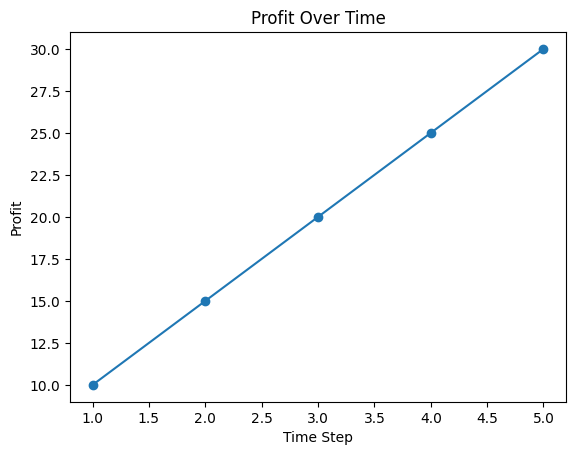

In [6]:
import matplotlib.pyplot as plt

# Example profit data
profits = [10, 15, 20, 25, 30]
steps = range(1, 6)

plt.plot(steps, profits, marker='o')
plt.title("Profit Over Time")
plt.xlabel("Time Step")
plt.ylabel("Profit")
plt.show()


Resource Allocation Over Time
Track how the computing resources are allocated over time to different AI consumers.



In [8]:
def plot_resource_allocation(allocation_history, num_consumers):
    steps = range(1, len(allocation_history) + 1)
    for consumer_id in range(num_consumers):
        allocation = [step[consumer_id] for step in allocation_history]
        plt.plot(steps, allocation, marker='o', label=f'Consumer {consumer_id}')

    plt.title("Resource Allocation Over Time")
    plt.xlabel("Time Step")
    plt.ylabel("Allocated Resources")
    plt.legend()
    plt.show()


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Simulated data
time_steps = 10
num_consumers = 3

# Initialize variables
allocation_history = []
cpp_profits = []
consumer_profits = [[] for _ in range(num_consumers)]
role_switching_history = [[] for _ in range(num_consumers)] # how the consumers have switched role
mining_success_rates = [[] for _ in range(num_consumers)]

# Simulate metrics for each time step
for t in range(time_steps):
    # Resource allocation for consumers
    allocation = [random.randint(10, 50) for _ in range(num_consumers)]
    allocation_history.append(allocation)

    # CPP profit simulation
    cpp_profit = sum(allocation) * random.uniform(0.8, 1.2)  # Revenue based on allocation
    cpp_profits.append(cpp_profit)

    # Consumer profits and role-switching
    for consumer_id in range(num_consumers):
        consumer_profit = allocation[consumer_id] * random.uniform(1.0, 1.5) - random.uniform(5, 15)
        consumer_profits[consumer_id].append(consumer_profit)

        role_switch = random.choice(["Miner", "AI Servicer"])
        role_switching_history[consumer_id].append(role_switch)

        mining_success_rate = random.uniform(0, 1)
        mining_success_rates[consumer_id].append(mining_success_rate)


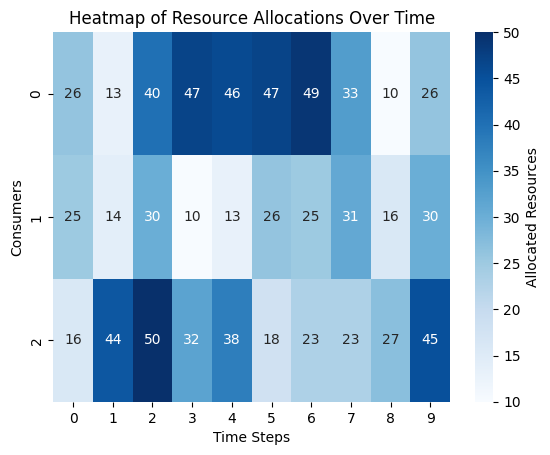

In [10]:
# Visualization 1: Heatmap of Resource Allocations
allocation_array = np.array(allocation_history).T
sns.heatmap(allocation_array, annot=True, fmt="d", cmap="Blues", cbar_kws={"label": "Allocated Resources"})
plt.title("Heatmap of Resource Allocations Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Consumers")
plt.show()

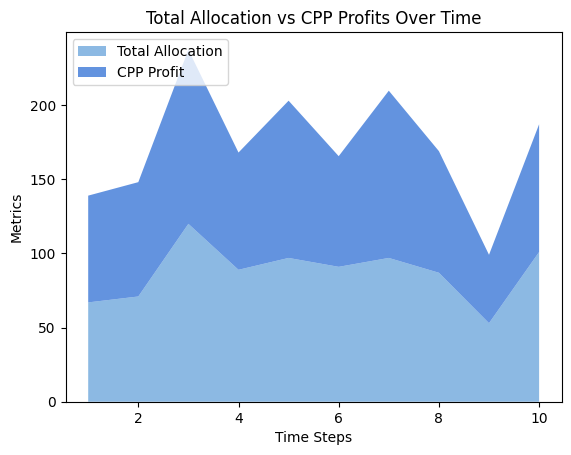

In [11]:
# Visualization 2: Stacked Area Plot for CPP Profit and Total Allocation
total_allocations = [sum(step) for step in allocation_history]
plt.stackplot(range(1, time_steps + 1), total_allocations, cpp_profits, labels=["Total Allocation", "CPP Profit"], alpha=0.8, colors=["#6fa8dc", "#3c78d8"])
plt.title("Total Allocation vs CPP Profits Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Metrics")
plt.legend(loc="upper left")
plt.show()

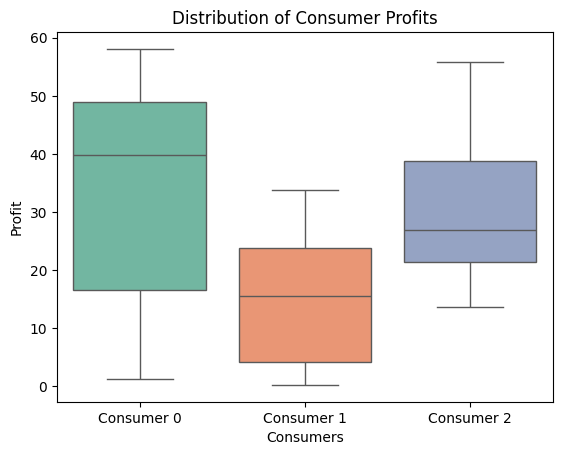

In [12]:
# Visualizatiing Consumer Profit Distribution (Boxplot)
sns.boxplot(data=consumer_profits, palette="Set2")
plt.title("Distribution of Consumer Profits")
plt.xlabel("Consumers")
plt.ylabel("Profit")
plt.xticks(ticks=range(num_consumers), labels=[f"Consumer {i}" for i in range(num_consumers)])
plt.show()


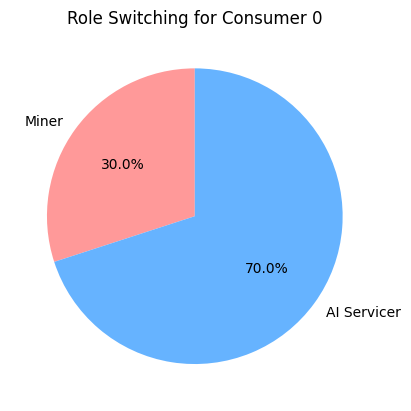

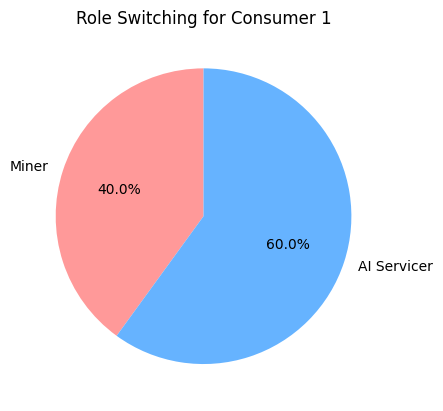

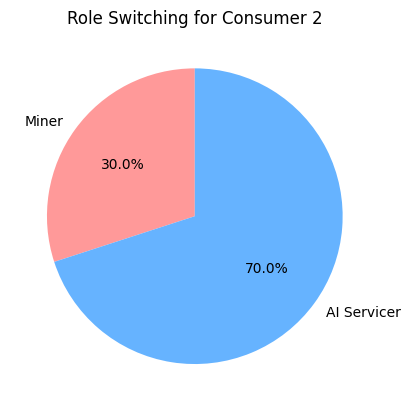

In [13]:
# Visualization 4: Role Switching as a Pie Chart
role_counts = [{role: role_switching_history[consumer_id].count(role) for role in ["Miner", "AI Servicer"]} for consumer_id in range(num_consumers)]
for consumer_id, counts in enumerate(role_counts):
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=90, colors=["#ff9999", "#66b3ff"])
    plt.title(f"Role Switching for Consumer {consumer_id}")
    plt.show()

<ipython-input-14-3be79c250d5f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=range(1, time_steps + 1), y=mining_success_rates[consumer_id], label=f"Consumer {consumer_id}", ci='sd')
<ipython-input-14-3be79c250d5f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=range(1, time_steps + 1), y=mining_success_rates[consumer_id], label=f"Consumer {consumer_id}", ci='sd')
<ipython-input-14-3be79c250d5f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=range(1, time_steps + 1), y=mining_success_rates[consumer_id], label=f"Consumer {consumer_id}", ci='sd')


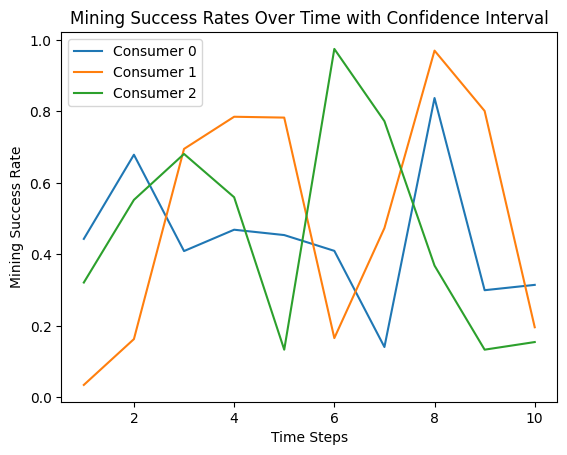

In [14]:
# Visualization 5: Line Plot with Confidence Interval (Mining Success Rates)
for consumer_id in range(num_consumers):
    sns.lineplot(x=range(1, time_steps + 1), y=mining_success_rates[consumer_id], label=f"Consumer {consumer_id}", ci='sd')
plt.title("Mining Success Rates Over Time with Confidence Interval")
plt.xlabel("Time Steps")
plt.ylabel("Mining Success Rate")
plt.legend()
plt.show()

<ipython-input-15-7d5bd78f4c46>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=mining_success_rates, palette="Pastel1", scale="width", inner="quartile")


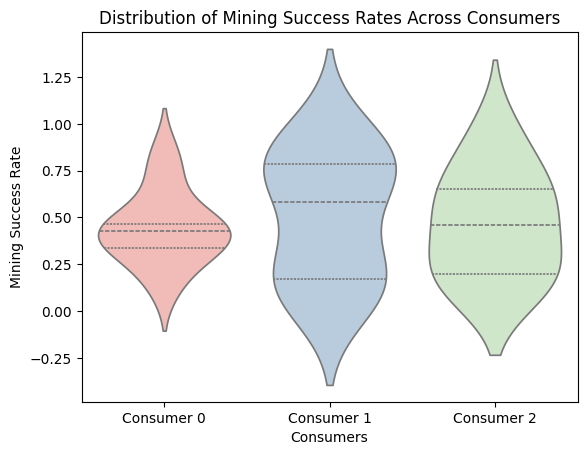

In [15]:
# Visualization 6: Violin Plot of Mining Success Rates
sns.violinplot(data=mining_success_rates, palette="Pastel1", scale="width", inner="quartile")
plt.title("Distribution of Mining Success Rates Across Consumers")
plt.xlabel("Consumers")
plt.ylabel("Mining Success Rate")
plt.xticks(ticks=range(num_consumers), labels=[f"Consumer {i}" for i in range(num_consumers)])
plt.show()